
# Assignment 1: Predicting overall The Human Freedom Index

This notebook contains a set of exercises that will guide you through the different steps of this assignment. Solutions need to be code-based, _i.e._ hard-coded or manually computed results will not be accepted. Remember to write your solutions to each exercise in the dedicated cells and to not modify the test cells. When you are done completing all the exercises submit this same notebook back to moodle in **.ipynb** format.

<div class="alert alert-success">

The <a href="https://www.cato.org/human-freedom-index/2021 ">Human Freedom Index</a> measures economic freedoms such as the freedom to trade or to use sound money, and it captures the degree to which people are free to enjoy the major freedoms often referred to as civil liberties—freedom of speech, religion, association, and assembly— in the countries in the survey. In addition, it includes indicators on rule of law, crime and violence, freedom of movement, and legal discrimination against same-sex relationships. We also include nine variables pertaining to women-specific freedoms that are found in various categories of the index.

<u>Citation</u>

Ian Vásquez, Fred McMahon, Ryan Murphy, and Guillermina Sutter Schneider, The Human Freedom Index 2021: A Global Measurement of Personal, Civil, and Economic Freedom (Washington: Cato Institute and the Fraser Institute, 2021).
    
</div>

<div class="alert alert-danger"><b>Submission deadline:</b> Sunday, January 29th, 23:55</div>


In [38]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [39]:
pip install matplotlib

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [40]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

<div class="alert alert-info"><b>Exercise 1</b>

Load the Human Freedom Index data from the link: https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv in a DataFrame called ```df```.

<br><i>[0.25 points]</i>
</div>
<div class="alert alert-warning">
Do not download the dataset. Instead, read the data directly from the provided link
</div>

In [41]:
df= pd.read_csv('https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv')

In [42]:
#LEAVE BLANK


<div class="alert alert-info"><b>Exercise 2</b>

First write the code to drop all the columns from the DataFrame ```df``` except ```['hf_quartile', 'ef_regulation',  'pf_expression', 'region']```, then drop all the rows from ```df``` containing missing values present in the selected columns.

<br><i>[0.25 points]</i>
</div>

<div class="alert alert-warning">

Remember, Python is case-sensitive. The resulting DataFrame ```df``` should contain only four columns.

</div>


In [43]:
df=df[['hf_quartile', 'ef_regulation',  'pf_expression', 'region']]

In [44]:
df=df.dropna(axis=0, how='any', subset=None, inplace=False)

In [45]:
#LEAVE BLANK

<div class="alert alert-info"><b>Exercise 3</b> 
    
Write the code to create the feature matrix ```X``` (```ef_regulation```,  ```pf_expression```, and ```region```) and the target array ```y``` (```hf_quartile```), then split them into separate training and test sets with the relative size of 0.75 and 0.25. Store the training and tests feature matrix in variables called ```X_train``` and ```X_test```, and the training and test label arrays as ```y_train``` and ```y_test```.
    
<br><i>[1 point]</i>
</div>


In [46]:
X= df.drop(columns=['hf_quartile'])
y= df['hf_quartile']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)

In [47]:
# LEAVE BLANK

In [48]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4 </b> 

    
The resulting feature matrix contains a categorical variable. Write the code to create a ```ColumnTransformer``` to encode it using the one-hot encoding method. Store the transformer in a variable called ```transformer```. At this stage, you do not need to run it.

<br><i>[1 points]</i>
</div>

<div class='alert alert-warning'>

Not all the attributes are categorical. Ensure that all non-categorical attributes remain intact.
</div>

In [49]:
onehotencoder= OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('ohe', onehotencoder, [2])], remainder = 'passthrough')

In [50]:
# LEAVE BLANK

In [51]:
# LEAVE BLANK

In [52]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5 </b> 

Write the code to create a ```Pipeline``` consisting of a ```SimpleImputer``` with the most frequent strategy, the previous transformer, a standard scaler, and a logistic regression model. Store the resulting pipeline in a variable called ```pipe```.
    
<br><i>[1.5 points]</i>
</div>

<div class='alert alert-warning'>

Be sure you apply the data transformations in the correct order.
</div>

In [53]:
pipeline_steps=[('imputer', SimpleImputer(strategy="most_frequent")),('preprocess', transformer), ('scale', StandardScaler()), ('lr', LogisticRegression())]
pipe = Pipeline(pipeline_steps)

In [54]:
# LEAVE BLANK

In [55]:
# LEAVE BLANK

In [56]:
# LEAVE BLANK

In [57]:
# LEAVE BLANK

In [58]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 6 </b> 
    
Write the code to store the achieved ```score``` (accuracy) in a variable called ```score```. 
    
<br><i>[1 point]</i>
</div>

<div class='alert alert-warning'>

Use train and test datasets correctly.
</div>

In [59]:
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 7 </b> 
    
The previous exercises were simple because they included only three columns. Now repeat the same process but using the complete dataset. This exercise is open. You can use any scaler, imputer, transformer, or encoder. The only requirement is to train a logistic regression. If you decide to drop a column, justify the reason. 
    
<br><i>[5 points]</i>
</div>

<div class='alert alert-warning'>
    
The following columns are redundant and should be dropped:
* ```year```
* ```ISO```
* ```countries```
* All columns containing the word ```rank``` 
* All columns containing the word ```score```
    
</div>


In [61]:
df= pd.read_csv('https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv')

Step 1: Column removal according to suggestions

In [62]:
df=df.drop(list(df.filter(regex='rank')), axis=1)
df=df.drop(list(df.filter(regex='score')), axis=1)
df=df.drop(['year', 'ISO', 'countries'], axis=1)


Step 2 : After removing all the columns stated in the instructions, we have decided to remove all features that had over 10% of missing values, as we believe imputing these missing values might lead to biased models. Additionally, we have opted to remove all rows for which the target value 'hf_quartile' is a missing value 

In [63]:
df= df.drop(df.columns[df.isna().sum()>=200], axis=1)
df=df.dropna(subset=['hf_quartile'])

Step 3: After this, we calculated the correlation between all features of the dataset and realized that the correlation between most of the features was high! To remedy this issue will use a pipe which will accomplish the following: 

-Impute the missing values with the mode for categorical features/ median for numerical features + One hot encode categorical variables 

-Scale all variables using the standard scaler

-PCAs to remove all correlation

In [64]:
categorical_featX=[]
numerical_featX = []
featY =[]
for col in df.columns: 
    
    if col == 'region':
        categorical_featX.append(col)
        
    elif col== 'hf_quartile':
        featY.append(col) 
        
    else:
        numerical_featX.append(col)

Step 4: Test/Train split 

In [65]:
#train-test split
X= df.drop(columns=['hf_quartile'])
y= df['hf_quartile']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1400, 97), (467, 97), (1400,), (467,))

Step 5: Pipe creation and model score

In [66]:
#creating the inner pipe to impute and encode categorical features, and impute numerical features
inner_steps_cat = [('imputer', SimpleImputer(strategy='most_frequent')), 
               ('ohe', OneHotEncoder(sparse=False))]

inner_pipe_cat= Pipeline(inner_steps_cat)

inner_steps_num = [('imputer', SimpleImputer(strategy='median'))]

inner_pipe_num = Pipeline(inner_steps_num)

transformer= ColumnTransformer([('preprocessing_cat', inner_pipe_cat, categorical_featX), 
                                ('preprocessing_num', inner_pipe_num, numerical_featX)], 
                               remainder='passthrough')

In [67]:
#creating the main pipe that carries out the inner pipe contained in transformer variable, scales our variables, creates PCAs, and then trains a Logistic Regression. 
pca=PCA()
steps= [('preprocess_data', transformer),
        ('scale', StandardScaler()),
        ('pca', pca),
        ('lr', LogisticRegression())]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['region']),
                                                 ('preprocessing_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['pf_rol', 'pf_ss_homicide',
                                                   'pf_ss_di...
                                                   'pf_religion_freedom_vdem',
                                                   'pf_religion_freedom_cld',
                                                   'pf_religion_freedom',
                                                   'pf_religion',
                                                   'pf_assembly_entry',
                                                   'pf_assembly_freedom_house',
                                                   'pf_assembly_freedom_cld',
                                                   'pf_assembly_freedom',
                                                   'pf_assembly_parties_barriers',
                                                   'pf_assembly_parties_bans',
                                                   'pf_assembly_parties_auton',
                                                   'pf_assembly_parties', ...])])),
                ('scale', StandardScaler()), ('pca', PCA()),
                ('lr', LogisticRegression())])

In [68]:
#Logistic Regression score
pipe.score(X_test, y_test)

0.9464668094218416

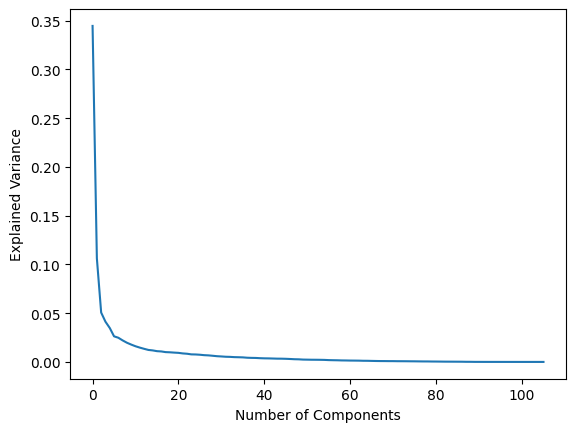

In [70]:

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()